# Gradient Descent in Numerical Computation

## Introduction
Gradient descent is an optimization algorithm used to minimize functions by iteratively moving towards the steepest descent, as defined by the negative of the gradient. It is widely used in machine learning and deep learning for optimizing cost functions.

## Mathematical Background
### Gradient Descent Algorithm
The gradient descent algorithm updates the parameters $\theta$ of a function to minimize the cost function $J(\theta)$:

$\theta := \theta - \alpha \nabla J(\theta)$
where:
- $\alpha$ is the learning rate
- $\nabla J(\theta)$ is the gradient of the cost function with respect to $\theta$


## In this notebook :
In this notebook, in the first section, first we create some data points. then, we want to fit a regression line to this points using gradient descent. at the end, we visualize the regression lines that we find through gradient descent updates.
In the secons section, we analyze that does gradient descent always converge to optimal solution or not.

## Create Data
Generate some data with y = $\theta_1*x + \theta_2$

$\theta_1 = 3$

$\theta_2 = 4$


Add some Gaussian noise to the data and plot the points and the main line

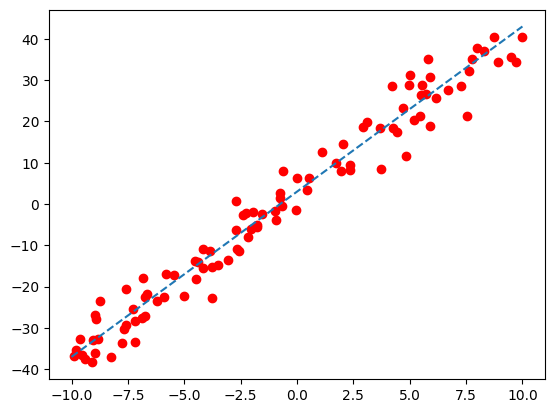

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
# Generate range of x and y values with adding some noise
x_values = np.random.uniform(-10, 10, 100)
y_values = (4 * x_values + 3) + np.random.normal(0, 4, 100)

# Plot the data
plt.plot([-10, 10], [4 * -10 + 3, 4 * 10 + 3], linestyle ='dashed')
plt.scatter(x_values, y_values, color = 'red')
plt.show()

implement gradient_descent and compute_cost functions. note that x and y are values of x's and y's points(noisy points), slope and intercept are the values of regression line that we are trying to find and fit to the data.
compute_cost function is a simple function to calculate the error or cost of the predicted value and main value.

In [8]:
# Function to compute gradients and update parameters
def gradient_descent(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64], slope: float, intercept: float, learning_rate: float) -> tuple[float, float]:
    'x and y are values that we give to function'
    'slope and intercept of the regression line would be given to function'
    'in order to use gradient descent and upate them'
    'at last we return updated slope and intercept'
    # From https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/
    predicted_y = slope * x + intercept
    slope_derivative = -(2/len(x)) * sum(x * (y-predicted_y))
    intercept_derivative = -(2/len(x)) * sum(y-predicted_y)
    return slope - learning_rate * slope_derivative, intercept - learning_rate * intercept_derivative

# Function to compute cost
def compute_cost(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64], slope: float, intercept: float) -> float:
    predicted_y = slope * x + intercept
    return (np.square(y - predicted_y)).mean()

In this cell, for the num_iterations, do gradient descent algorithm and save slope and intercepts, also compute costs and save them to.

In [11]:
# Initialize parameters (slope and intercept)
slope = 1
intercept = 1

# Set hyperparameters
learning_rate = 0.01
num_iterations = 100



# Lists to store parameters and costs at each iteration
slope_history = [slope]
intercept_history = [intercept]
cost_history = [compute_cost(x_values, y_values, slope, intercept)]

# Perform gradient descent
for i in range(num_iterations):
    'perform gradient descent and keep slopes and intecepts and costs in each iteration'
    slope, intercept = gradient_descent(x_values, y_values, slope, intercept, learning_rate)
    slope_history.append(slope)
    intercept_history.append(intercept)
    cost_history.append(compute_cost(x_values, y_values, slope, intercept))
    



Now, plot the regression lines with the saved slope and intercepts all in 1 plot and visualize them.

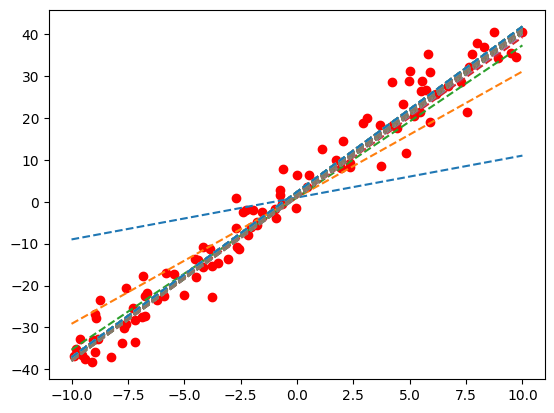

In [12]:
for (slope, intercept) in zip(slope_history, intercept_history):
    plt.plot([-10, 10], [slope * -10 + intercept, slope * 10 + intercept], linestyle ='dashed')
plt.scatter(x_values, y_values, color = 'red')
plt.show()

Now plot the costs against iterations.

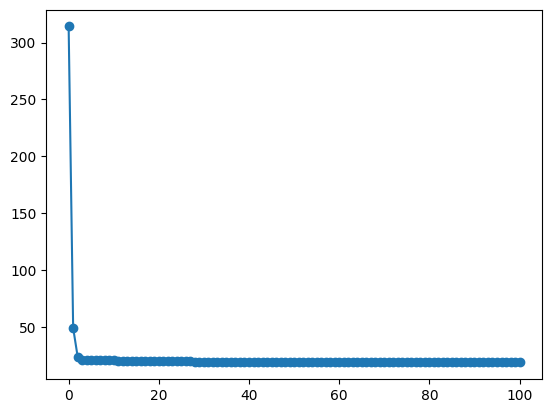

In [13]:
plt.plot(np.array(cost_history), marker = 'o')
plt.show()

## Section 2:
In this section, we define a function that has some local minimas. then we use gradient descent algorithm with random points and visualize the function and the minimums that find with gradient descent.

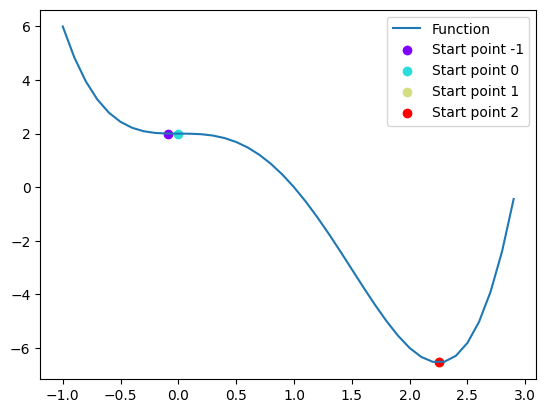

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define a simple convex loss function with multiple local minima
def loss_function(x):
    return x**4 - 3*x**3 + 2

# Define the derivative of the loss function
def gradient(x: float) -> float:
    return 4*x**3 - 9*x**2

# Gradient Descent function
def gradient_descent(initial_x: float, learning_rate: float, num_iterations: int) -> float:
    x = initial_x
    for _ in range(num_iterations):
        x = x - learning_rate * gradient(x)
    return x

# Visualize the function
x_values = np.arange(-1, 3., 0.1)
y_values = loss_function(x_values)
plt.plot(x_values, y_values, label="Function")

# Run gradient descent with different initializations and plot the points that gradient descent finds them to be optimal minima
TEST_POINTS = [-1, 0, 1, 2]
COLORS = cm.rainbow(np.linspace(0, 1, len(TEST_POINTS))) # https://stackoverflow.com/a/12236808/4213397
for i, c in zip(TEST_POINTS, COLORS):
    x = gradient_descent(i, 0.01, 100)
    plt.scatter(x, loss_function(x), color=c, label=f"Start point {i}")
plt.legend(loc="upper right")
plt.show()

## Question :
Does gradient descent converges to the optimum solution or not in this example ?
Does gradient descent always converges to the optimum solution ? under what circumstances gradient descent converges ?

In this example it does not. It also does not always converge to the optimum solution. This method or hill climbing method in general will find the local maximum or minimum and not always the global one. It all depends on the starting location. A good strategy is to restart with another random point and hope that it will find the optimum solution. Also, it might also be because of very small slopes around 0 for this function that makes the hill climbing stop.